In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import VotingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import metrics

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

## Data Daegu Apartment

[Sumber data Daegu Apartment](https://www.kaggle.com/datasets/gunhee/koreahousedata/versions/1) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Modeling
4. Conclusion
5. Recommendation

****

### **1. Business Problem Understanding**

#### Problem Statement

Kendala yang dihadapi oleh perusahaan adalah user yang menjual properti dengan harga yang tidak sesuai dengan jangkauan pasar dan fasilitas yang diberikan sehingga menganggu estimasi harga jual pada website perusahaan. Dimana estimasi harga jual tidak boleh terlalu tinggi (tidak sesuai dengan fasilitas dan strategis lokasi) ataupun terlalu rendah (merugikan user yang memasang iklan). Sebagai bentuk solusi, diperlukan data scientist untuk menentukan harga yang optimal bagi user yang menjual properti di website perusahaan sebagai estimasi harga jual yang ideal.

#### Goals

Berdasarkan dari masalah tersebut, perusahaan tentu perlu memiliki 'tool' yang dapat memprediksi serta membantu user untuk menentukan harga jual properti (apartment) dengan harga yang tepat dan sesuai.

#### Analytic Approach

Hal yang perlu dilakukan yaitu menganalisis data dan membuat model regresi yang akan membantu perusahaan untuk menyediakan 'tool' prediksi harga jual properti (apartment) di daerah Daegu. 
 

#### Metric Evaluation

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE. RMSE adalah jumlah dari kesalahan kuadrat atau selisih antara nilai sebenarnya dengan nilai prediksi yang telah ditentukan, MAE menunjukkan nilai kesalahan rata-rata yang error dari nilai sebenarnya dengan nilai prediksi, sedangkan MAPE adalah  lanjutan dari penentuan nilai MAE dengan menentukan nilai presentase yang dihasilkan. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga jual sesuai dengan limitasi fitur yang digunakan. 

### **2. Data Understanding**

- Dataset merupakan detail real estate periode waktu dalam 10 tahun.
- Setiap baris data merepresentasikan informasi terkait apartemen, fasilitas, dan harga.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType | Object | Tipe hallway |
| TimeToSubway | Object | Waktu tempuh ke stasiun |
| SubwayStation | Object | Nama stasiun  |
| N_FacilitiesNearBy(ETC) | Float | Jumlah tol terdekat |
| N_FacilitiesNearBy(PublicOffice) | Float | Jumlah perkantoran umum terdekat |
| N_SchoolNearBy(University) | Float | Jumlah sekolah atau kampus terdekat |
| N_Parkinglot(Basement) | Float | Jumlah tempat parkir |
| YearBuilt | Integer | Tahun dibangun |
| N_FacilitiesInApt | Integer | Jumlah fasilitas yang ada di apartemen |
| Size(sqf) | Integer | Luas apartemen |
| SalePrice | Integer | Harga apartemen dalam dollar |

<br>

#### Data Cleaning

In [2]:
# Load dataset

df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [3]:
# Cek info dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [4]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [5]:
# Cek nilai missing value

df.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

Data ini tidak mempunyai missing value

In [6]:
# Cek data duplikat

df.duplicated().value_counts()

False    2701
True     1422
dtype: int64

Ternyata ada 1422 data duplikat

In [7]:
# Drop data duplikat

df = df[~df.duplicated(keep= 'first')]

In [8]:
# Mengecek kembali jumlah data

df.shape

(2701, 11)

- Kategorikal =  Barplot
- Numerikal = Scatterplot

#### Exploratory Data Analysis

<AxesSubplot:xlabel='HallwayType', ylabel='SalePrice'>

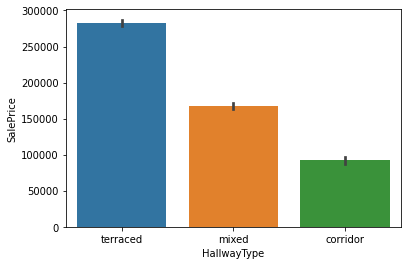

In [9]:
sns.barplot(data=df, x='HallwayType', y='SalePrice')

Berdasarkan barplot diatas, terlihat bahwa tipe hallway terraced lebih mahal dan tipe hallway yang corridor paling murah.

In [10]:
df.groupby('SubwayStation').mean()['SalePrice'].sort_values(ascending=False).index

Index(['Banwoldang', 'Kyungbuk_uni_hospital', 'Sin-nam', 'no_subway_nearby',
       'Bangoge', 'Myung-duk', 'Daegu', 'Chil-sung-market'],
      dtype='object', name='SubwayStation')

<AxesSubplot:xlabel='SubwayStation', ylabel='SalePrice'>

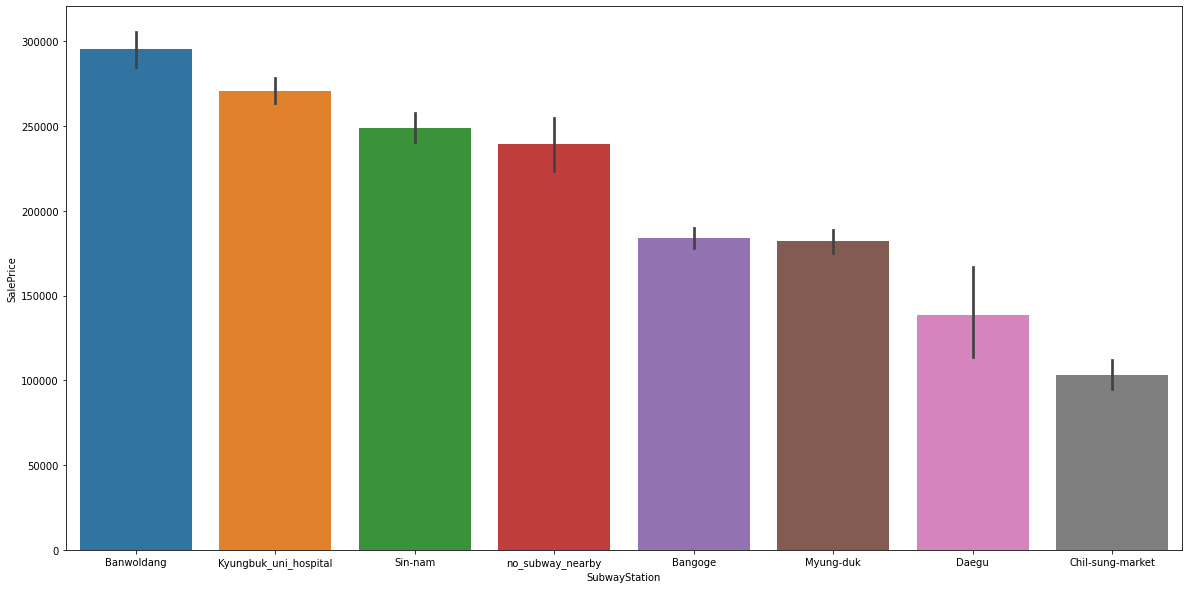

In [11]:
plt.figure(figsize=(20,10))
sns.barplot(data=df, y='SalePrice', x='SubwayStation', order=df.groupby('SubwayStation').mean()['SalePrice'].sort_values(ascending=False).index)

Berdasarkan barplot diatas, terlihat bahwa:
- Harga apartemen di dekat Stasiun Banwoidang paling mahal, sedangkan yang paling murah di dekat Chil-sung-market
- Harga apartemen di dekat rumah sakit Universitas Kyungbuk menempati kedua termahal
- Ternyata apartemen yang letaknya tidak dekat dengan stasiun juga harganya lumayan mahal

In [12]:
df.groupby('TimeToSubway').mean()['SalePrice'].sort_values(ascending=False).index

Index(['0-5min', 'no_bus_stop_nearby', '5min~10min', '10min~15min',
       '15min~20min'],
      dtype='object', name='TimeToSubway')

<AxesSubplot:xlabel='TimeToSubway', ylabel='SalePrice'>

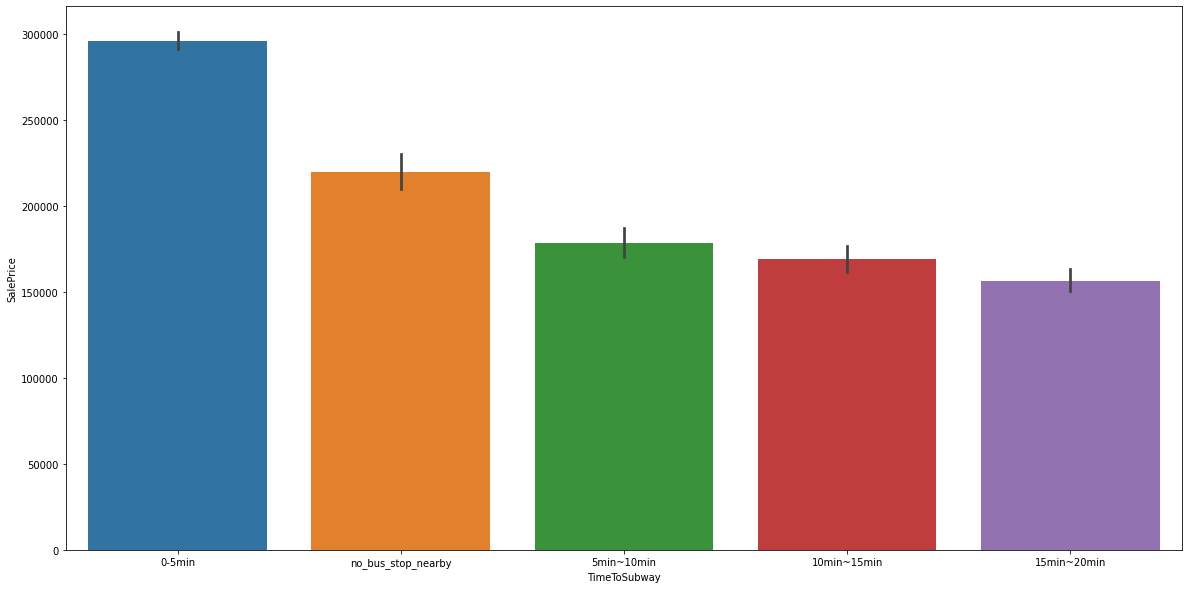

In [13]:
plt.figure(figsize=(20,10))
sns.barplot(data=df, y='SalePrice', x='TimeToSubway', order=df.groupby('TimeToSubway').mean()['SalePrice'].sort_values(ascending=False).index)

Dari barplot diatas kita bisa menyimpulkan bahwa waktu tempuh ke stasiun tidak mempengaruhi harga dari apartemen di daerah Daegu. Walaupun tidak terdapat stasiun bus harga apartemennya menempati ke-dua termahal

<AxesSubplot:xlabel='N_FacilitiesNearBy(ETC)', ylabel='SalePrice'>

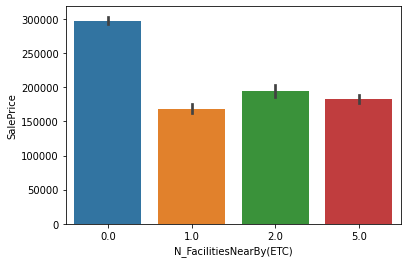

In [14]:
sns.barplot(data=df, y='SalePrice', x='N_FacilitiesNearBy(ETC)')

Dari barplot diatas kita bisa melihat bahwa jumlah tol terdekat tidak mempengaruhi harga dari apartemen di daerah Daegu. Harga tertinggi di tempati dengan apartemen yang tidak memiliki fasilitas tol terdekat. Bahkan fasilitas yang mempunyai tol terbanyak menempati posisi kedua termurah

<AxesSubplot:xlabel='N_FacilitiesNearBy(PublicOffice)', ylabel='SalePrice'>

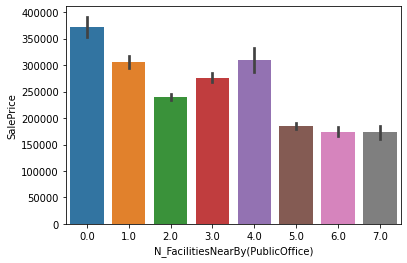

In [15]:
sns.barplot(data=df, y='SalePrice', x='N_FacilitiesNearBy(PublicOffice)')

Dari barplot diatas kita bisa melihat bahwa apartemen yang lokasinya jauh dengan perkantoran umum itu lebih mahal dibandingkan dengan apartemen yang lokasinya dekat dengan perkantoran umum.

<AxesSubplot:xlabel='N_SchoolNearBy(University)', ylabel='SalePrice'>

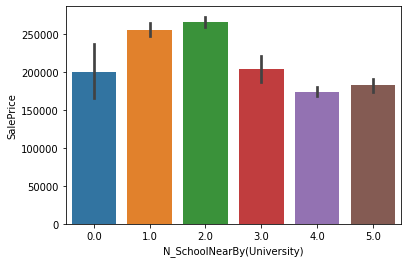

In [16]:
sns.barplot(data=df, y='SalePrice', x='N_SchoolNearBy(University)')

Dari barplot diatas dapat disimpulkan bahwa apartemen yang memiliki kawasan dekat dengan area sekolah atau tidak memiliki nilai jual yang serupa, sehingga kawasan yang memiliki fasilitas dekat dengan sekolah tidak mempengaruhi nilai jual apartemen itu sendiri

<AxesSubplot:xlabel='N_Parkinglot(Basement)', ylabel='SalePrice'>

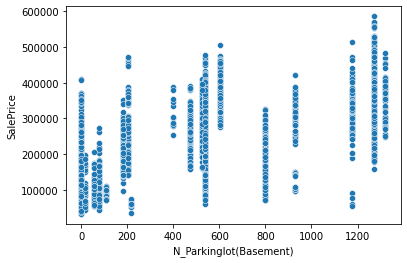

In [17]:
sns.scatterplot(data=df, y='SalePrice', x='N_Parkinglot(Basement)')

Dari gambar diatas kita bisa melihat bahwa jumlah parkir juga mempengaruhi harga jual dari suatu apartemen. Semakin banyak jumlah parkir pada suatu apartemen harganya semakin mahal

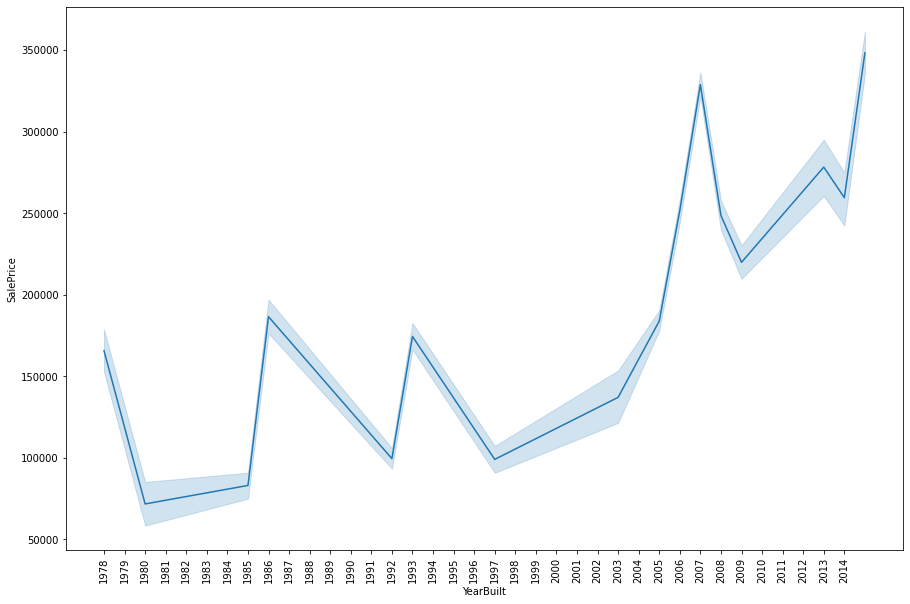

In [18]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, y='SalePrice', x='YearBuilt')
plt.xticks(range(1978, 2015), rotation=90);

Grafik diatas menunjukkan bahwa tahun dibangunnya suatu apartemen mempengaruhi harga jual dari apartemen. Terbukti pada tahun 2014 adalah harga paling mahal

<AxesSubplot:xlabel='N_FacilitiesInApt', ylabel='SalePrice'>

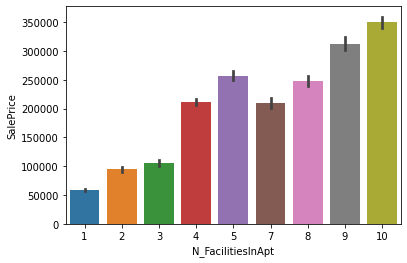

In [19]:
sns.barplot(data=df, y='SalePrice', x='N_FacilitiesInApt')

Dari barplot diatas kita bisa melihat semakin banyak fasilitas di suatu apartment, harganya semakin mahal

<AxesSubplot:xlabel='Size(sqf)', ylabel='SalePrice'>

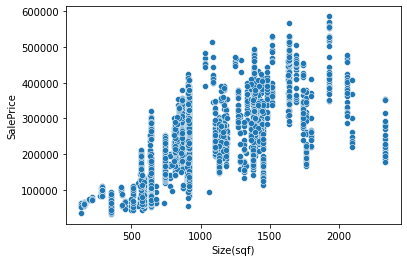

In [20]:
sns.scatterplot(data=df, y='SalePrice', x='Size(sqf)')

Dari scatter plot diatas kita bisa melihat bahwa semakin luas bangunannya semakin mahal harganya pada rentang 0 - 2000 sqf. Tetapi ketika luasnya diatas 2000 sqf harganya kembali turun

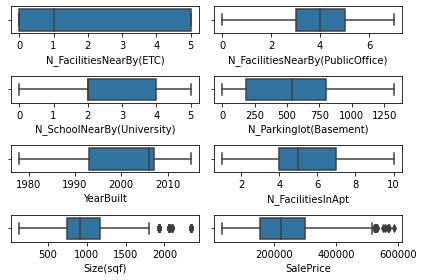

In [21]:
# Mengecek outliers 

plt.subplot(4,2,1)
sns.boxplot(data=df, x='N_FacilitiesNearBy(ETC)')
plt.subplot(4,2,2)
sns.boxplot(data=df, x='N_FacilitiesNearBy(PublicOffice)')
plt.subplot(4,2,3)
sns.boxplot(data=df, x='N_SchoolNearBy(University)')
plt.subplot(4,2,4)
sns.boxplot(data=df, x='N_Parkinglot(Basement)')
plt.subplot(4,2,5)
sns.boxplot(data=df, x='YearBuilt')
plt.subplot(4,2,6)
sns.boxplot(data=df, x='N_FacilitiesInApt')
plt.subplot(4,2,7)
sns.boxplot(data=df, x='Size(sqf)')
plt.subplot(4,2,8)
sns.boxplot(data=df, x='SalePrice')
plt.tight_layout()

Terlihat outlier ada pada 2 fitur yaitu 'Size(sqf)' dan 'SalePrice'. Dalam project ini saya tidak akan membuang outliers karena datanya sedikit dan saya tidak ingin mengurangi data. Oleh karena itu pada evaluasi metric kita akan menggunakan MAE. Sedangkan menggunakan RMSE agar lebih mudah diinterpretasikan.

### **3. Modeling**

In [22]:
# Define X and y

X = df.drop(columns='SalePrice')
y = df['SalePrice']

In [23]:
# Data splitting dengan proporsi 80:20

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0
)

Disini kita akan mengubah fitur kategorikal menjadi numerikal terlebih dahulu menggunakan OneHotEncoder

In [24]:
# Preprocessing

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['HallwayType', 'TimeToSubway', 'SubwayStation'])
], remainder='passthrough')

In [25]:
# Scaling

scaler = RobustScaler()

In [26]:
# Define models (6 kandidat model)

lasso = Lasso(alpha=1)
knn = KNeighborsRegressor(n_neighbors=5)
tree = DecisionTreeRegressor(criterion='absolute_error',min_samples_leaf=1, max_depth=5, random_state=0 )
rf = RandomForestRegressor(random_state=0)
ada = AdaBoostRegressor(random_state=0)
grad = GradientBoostingRegressor(random_state=0)

In [27]:
models = [lasso, knn, tree, rf, ada, grad]

cv_mean = []
cv_std = []

for i in models:
    pipe_model = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    model_cv =cross_val_score(
        estimator= pipe_model,
        X = X_train,
        y = y_train,
        cv = 5,
        scoring = 'neg_mean_absolute_error'
    )

    cv_mean.append(model_cv.mean())
    cv_std.append(model_cv.std())

    print(model_cv, i)

[-39618.01860316 -41270.78989787 -44126.68081141 -43147.63036268
 -41437.93056367] Lasso(alpha=1)
[-39665.90925926 -36808.05231481 -41998.29953704 -39088.825
 -40317.7287037 ] KNeighborsRegressor()
[-39907.81481481 -39504.96875    -40893.97222222 -39032.20023148
 -41461.43171296] DecisionTreeRegressor(criterion='absolute_error', max_depth=5, random_state=0)
[-36674.59427829 -36372.18778339 -39117.34918715 -37213.25677699
 -38536.82112957] RandomForestRegressor(random_state=0)
[-40098.80094351 -42875.47288642 -45218.43273346 -43419.71762857
 -42389.42324178] AdaBoostRegressor(random_state=0)
[-36249.14049356 -36844.49312581 -39509.51762481 -37498.41331132
 -38622.82129015] GradientBoostingRegressor(random_state=0)


In [28]:
cv_mean

[-41920.210047759385,
 -39575.76296296296,
 -40160.07754629629,
 -37582.84183107907,
 -42800.36948674958,
 -37744.87716913027]

In [29]:
# Perbandingan performa antar model

pd.DataFrame({
    'model':['Lasso', 'KNN Regressor', 'Decision Tree Regressor', 'RandomForestRegressor', 'AdaBoostRegressor', 'GradientBoostingRegressor'],
    'mean': cv_mean,
    'std': cv_std
})

,model,mean,std
0,Lasso,-41920.210048,1570.318397
1,KNN Regressor,-39575.762963,1692.610633
2,Decision Tree Regressor,-40160.077546,894.095668
3,RandomForestRegressor,-37582.841831,1066.956352
4,AdaBoostRegressor,-42800.369487,1655.512725
5,GradientBoostingRegressor,-37744.877169,1182.658520


#### **Interpretasi**

- Dari keenam model yang dicoba, ternyata model Random Forest Regressor menghasilkan error yang paling kecil
- Decision Tree Regressor juga cukup stabil
- Untuk selanjutnya, hanya model Random Forest Regressor saja yang akan diuji pada test set dan juga dilakukan tuning.

Random Forest  merupakan salah satu metode dalam Decision Tree.
Jadi alasan mengapa disebut random forest adalah karena kita melakukan penghitungan decision tree beberapa kali sehingga membentuk sebuah forest.
Model ini memiliki tingkat akurasi cukup tinggi karena random forest mengambil rata-rata (average) dari sekian banyak prediksi. Dengan demikian, model ini bisa meminimumkan error-nya.

#### **Hyperparameter Tuning**

Cari hyperparameter terbaik untuk *Random Forest*

In [30]:
# hyperparameter yang akan diisikan pada model

hyperparam_space = {
    'model__criterion' : ['absolute_error', 'squared_error'],
    'model__n_estimators': range(100,1000,5),
    'model__max_features': range(2,10,1),
    'model__max_depth': range(1,50,1),
    'model__min_samples_split': range(2, 100, 2),
    'model__min_samples_leaf': range(2, 100, 2)
}


In [31]:
# RandomizedSearchCV

pipe_model = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('model', rf)
    ])

random_search = RandomizedSearchCV(
    estimator= pipe_model,
    param_distributions= hyperparam_space,
    cv= 5,
    scoring= 'neg_mean_absolute_error',
    n_jobs= -1,
    n_iter= 50,
    random_state= 0
)

In [32]:
# fit randomized_search pada train set

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType',
                                                                                'TimeToSubway',
                                                                                'SubwayStation'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              RandomForestRegressor(random_state=0))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__criterion': ['absolute_error',
                                                             'squared_error'],
                                        'model__max_depth': range(1, 50),
                                        'model__max_features': range(2, 10),
                                        'model__min_samples_leaf': range(2, 100, 2),
                                        'model__min_samples_split': range(2, 100, 2),
                                        'model__n_estimators': range(100, 1000, 5)},
                   random_state=0, scoring='neg_mean_absolute_error')

In [33]:
# score terbaik hasil dari randomized_search
print(random_search.best_score_)

# hyperparameter pada score terbaik hasil dari randomized_search
print(random_search.best_params_)

-38109.904380325235
{'model__n_estimators': 395, 'model__min_samples_split': 22, 'model__min_samples_leaf': 6, 'model__max_features': 8, 'model__max_depth': 7, 'model__criterion': 'squared_error'}


In [34]:
# hasil dari 50 kombinasi hyperparameter
pd.DataFrame(random_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,param_model__criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.953229,0.148216,0.107704,0.004672,580,12,12,7,12,squared_error,"{'model__n_estimators': 580, 'model__min_sampl...",-37190.970051,-36973.327234,-40666.710209,-39029.652080,-39090.513882,-38590.234691,1365.829326,2
1,1.206199,0.042683,0.075049,0.004545,395,22,6,8,7,squared_error,"{'model__n_estimators': 395, 'model__min_sampl...",-36691.873212,-36751.566632,-39927.166399,-38123.107741,-39055.807918,-38109.904380,1269.113305,1
2,1.979202,0.053518,0.135275,0.023660,705,82,52,5,12,squared_error,"{'model__n_estimators': 705, 'model__min_sampl...",-43463.071892,-40908.886833,-45580.295199,-44300.114723,-43124.347379,-43475.343205,1537.603195,27
3,3.370537,0.066236,0.027110,0.008170,105,56,64,9,26,absolute_error,"{'model__n_estimators': 105, 'model__min_sampl...",-41661.600375,-39326.328175,-43550.050507,-42717.297465,-42659.816347,-41983.018574,1456.991649,20
4,10.484330,0.424350,0.057336,0.001621,350,50,24,7,12,absolute_error,"{'model__n_estimators': 350, 'model__min_sampl...",-38194.611200,-37345.303231,-41729.489236,-39966.678866,-39850.971055,-39417.410718,1524.745568,5


In [35]:
# model dengan score tertinggi

pd.DataFrame(random_search.cv_results_).sort_values(by='mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,param_model__criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,1.206199,0.042683,0.075049,0.004545,395,22,6,8,7,squared_error,"{'model__n_estimators': 395, 'model__min_sampl...",-36691.873212,-36751.566632,-39927.166399,-38123.107741,-39055.807918,-38109.904380,1269.113305,1
0,1.953229,0.148216,0.107704,0.004672,580,12,12,7,12,squared_error,"{'model__n_estimators': 580, 'model__min_sampl...",-37190.970051,-36973.327234,-40666.710209,-39029.652080,-39090.513882,-38590.234691,1365.829326,2
13,25.463893,0.264608,0.104121,0.003601,715,60,16,9,36,absolute_error,"{'model__n_estimators': 715, 'model__min_sampl...",-37741.386880,-37191.943156,-41231.643640,-39606.294211,-39710.011187,-39096.255815,1460.054281,3
32,11.893707,2.316010,0.107513,0.042456,475,22,14,3,28,absolute_error,"{'model__n_estimators': 475, 'model__min_sampl...",-37705.201192,-37422.083202,-41135.507895,-40286.274481,-40096.443012,-39329.101956,1486.059768,4
4,10.484330,0.424350,0.057336,0.001621,350,50,24,7,12,absolute_error,"{'model__n_estimators': 350, 'model__min_sampl...",-38194.611200,-37345.303231,-41729.489236,-39966.678866,-39850.971055,-39417.410718,1524.745568,5


MAE di train set:
- sebelum hyperparameter tuning: 37582 (cross validation pada benchmark model)
- setelah hyperparameter tuning: 38109 (randomized search)

Hyperparameter tuning 1 **tidak** berhasil. Berarti kita akan melakukan hyperparameter tuning 2.

#### **Hyperparameter tuning ke-2**

In [36]:

hyperparam_space = {
    'model__criterion' : ['absolute_error', 'squared_error'],
    'model__n_estimators': range(200,500,5),
    'model__max_features': range(5,10,1),
    'model__max_depth': range(5,20,1),
    'model__min_samples_split': range(10, 35, 2),
    'model__min_samples_leaf': range(2, 20, 2)
}

Pada tuning ke 2 ini ada beberapa perubahan pada hyperparam_space yaitu:
- Pada 'model__n_estimators' di hyperparameter tuning pertama range-nya mulai dari 100 s/d 1000. Sedangkan di tuning kedua  range-nya dipersempit menjadi 200 s/d 500. Alasan kenapa mempersempit di range tersebut karena pada tuning pertama parameter terbaiknya ada di 395
- Pada 'model__max_features' di hyperparameter tuning pertama range-nya mulai dari 2 s/d 10. Sedangkan di tuning kedua  range-nya dipersempit menjadi 5 s/d 10. Alasan kenapa mempersempit di range tersebut karena pada tuning pertama parameter terbaiknya ada di 8
- Pada 'model__max_depth' di hyperparameter tuning pertama range-nya mulai dari 1 s/d 50. Sedangkan di tuning kedua  range-nya dipersempit menjadi 5 s/d 20. Alasan kenapa mempersempit di range tersebut karena pada tuning pertama parameter terbaiknya ada di 7
- Pada 'model__min_samples_split' di hyperparameter tuning pertama range-nya mulai dari 2 s/d 100. Sedangkan di tuning kedua  range-nya dipersempit menjadi 10 s/d 35. Alasan kenapa mempersempit di range tersebut karena pada tuning pertama parameter terbaiknya ada di 22
- Pada 'model__min_samples_leaf' di hyperparameter tuning pertama range-nya mulai dari 2 s/d 100. Sedangkan di tuning kedua  range-nya dipersempit menjadi 2 s/d 20. Alasan kenapa mempersempit di range tersebut karena pada tuning pertama parameter terbaiknya ada di 6


In [37]:
# RandomizedSearchCV

pipe_model = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('model', rf)
    ])

random_search = RandomizedSearchCV(
    estimator= pipe_model,
    param_distributions= hyperparam_space,
    cv= 5,
    scoring= 'neg_mean_absolute_error',
    n_jobs= -1,
    n_iter= 100,
    random_state= 0
)

Pada hyperparameter pertama kita menggunakan 50 kali percobaan (n-iter), pada tuning kedua menggunakan 100 kali percobaan

In [38]:
# fit randomized_search pada train set

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType',
                                                                                'TimeToSubway',
                                                                                'SubwayStation'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              RandomForestRegressor(random_state=0))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'model__criterion': ['absolute_error',
                                                             'squared_error'],
                                        'model__max_depth': range(5, 20),
                                        'model__max_features': range(5, 10),
                                        'model__min_samples_leaf': range(2, 20, 2),
                                        'model__min_samples_split': range(10, 35, 2),
                                        'model__n_estimators': range(200, 500, 5)},
                   random_state=0, scoring='neg_mean_absolute_error')

In [39]:
# score terbaik hasil dari randomized_search
print(random_search.best_score_)

# hyperparameter pada score terbaik hasil dari randomized_search
print(random_search.best_params_)

-37298.95495113169
{'model__n_estimators': 270, 'model__min_samples_split': 10, 'model__min_samples_leaf': 2, 'model__max_features': 5, 'model__max_depth': 15, 'model__criterion': 'absolute_error'}


In [40]:
# hasil dari 100 kombinasi hyperparameter
pd.DataFrame(random_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,param_model__criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,12.909185,1.240914,0.065207,0.007753,255,34,10,8,13,absolute_error,"{'model__n_estimators': 255, 'model__min_sampl...",-36755.640092,-36596.752224,-39938.827560,-38842.483647,-39063.669231,-38239.474551,1328.985992,48
1,13.970930,1.040494,0.077785,0.007370,460,14,16,6,8,absolute_error,"{'model__n_estimators': 460, 'model__min_sampl...",-37461.306406,-37062.820582,-40697.564430,-39607.570146,-39790.430457,-38923.938404,1411.875492,79
2,1.130617,0.056375,0.068595,0.005970,375,12,6,7,17,squared_error,"{'model__n_estimators': 375, 'model__min_sampl...",-36738.624704,-36336.518984,-39845.859919,-38008.438973,-39232.544678,-38032.397451,1362.308716,28
3,10.426850,0.142632,0.060980,0.001522,375,16,14,6,9,absolute_error,"{'model__n_estimators': 375, 'model__min_sampl...",-37060.887522,-36854.478571,-40367.296253,-39335.508481,-39530.407679,-38629.715701,1410.054211,64
4,9.262300,0.113322,0.060826,0.017166,315,16,6,6,15,absolute_error,"{'model__n_estimators': 315, 'model__min_sampl...",-36084.789256,-35878.047597,-39299.762188,-38280.852385,-39139.599809,-37736.610247,1475.858456,7


MAE di train set:
- sebelum hyperparameter tuning: 37582 (cross validation pada benchmark model)
- setelah hyperparameter tuning 1: 38109 (randomized search)
- setelah hyperparameter tuning 2: 37298 (randomized search)

Hyperparameter tuning 2 **berhasil**

#### **Model Performance in Test Set**

In [41]:
# model benchmark
rf = RandomForestRegressor(criterion='absolute_error', min_samples_leaf=1, max_depth=5, random_state=0)

# model benchmark
pipe_model = Pipeline([
    ('preprocess', transformer),
    ('scaler', RobustScaler()),
    ('model', rf)
])

In [42]:
# fitting
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['HallwayType',
                                                   'TimeToSubway',
                                                   'SubwayStation'])])),
                ('scaler', RobustScaler()),
                ('model',
                 RandomForestRegressor(criterion='absolute_error', max_depth=5,
                                       random_state=0))])

In [43]:
# predict
y_pred = pipe_model.predict(X_test)

In [44]:
# Metric evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

before_tuning = pd.DataFrame({'RMSE': rmse, 'MAE': mae, 'MAPE': mape},index=[0])
before_tuning

,RMSE,MAE,MAPE
0,51297.16533,38812.506978,0.193426


In [45]:
final_model = random_search.best_estimator_ 

In [46]:
# fitting
final_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['HallwayType',
                                                   'TimeToSubway',
                                                   'SubwayStation'])])),
                ('scaler', RobustScaler()),
                ('model',
                 RandomForestRegressor(criterion='absolute_error', max_depth=15,
                                       max_features=5, min_samples_leaf=2,
                                       min_samples_split=10, n_estimators=270,
                                       random_state=0))])

In [47]:
# predict
y_pred_final = final_model.predict(X_test)

In [48]:
# Metric evaluation
mse = mean_squared_error(y_test, y_pred_final)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_final)
mape = mean_absolute_percentage_error(y_test, y_pred_final)

after_tuning = pd.DataFrame({'RMSE': rmse, 'MAE': mae, 'MAPE': mape},index=[0])
after_tuning


,RMSE,MAE,MAPE
0,50095.610406,37657.193147,0.185205


#### **Performance Comparison**

In [49]:
# Sebelum hyperparameter tuning

before_tuning

,RMSE,MAE,MAPE
0,51297.16533,38812.506978,0.193426


In [50]:
# Sebelum hyperparameter tuning

after_tuning

,RMSE,MAE,MAPE
0,50095.610406,37657.193147,0.185205


Model mengalami peningkatan performa dengan dilakukan hyperparameter tuning selama 2 kali

- RMSE, MAE & MAPE sebelum tuning: 51297.16, 38812.50, 0.19
- RMSE, MAE & MAPE setelah tuning: 49788.19, 37530.40, 0.18

**Nilai MAPE yang didapat yaitu 18% menjadikan model ini dapat dikategorikan ke dalam 'Good Forecasting' (Lewis, 1982)**

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

Text(0.5, 1.0, 'Residual Plot')

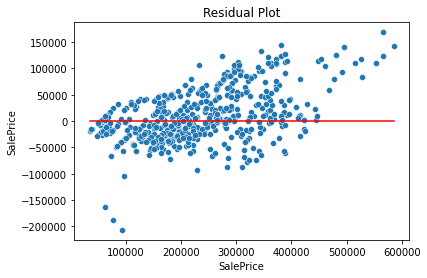

In [51]:
sns.scatterplot(x=y_test, y=(y_test-y_pred_final))
sns.lineplot(x=y_test, y=0, color='red')
plt.title('Residual Plot')

Dari scatterplot diatas kita bisa melihat bahwa semakin tinggi nilai prediksinya, errornya juga semakin besar.

#### **Feature Importances**

Disini kita dapat melihat fitur apa saja yang sangat mempengaruhi target yaitu 'SalePrice'.

In [52]:
final_model['model'].feature_importances_

array([0.01780633, 0.13402369, 0.00643326, 0.00451208, 0.0063869 ,
       0.00119291, 0.0052758 , 0.00195272, 0.00127894, 0.00801823,
       0.00224468, 0.00310951, 0.00267682, 0.06099733, 0.04161148,
       0.02627633, 0.11179802, 0.12243584, 0.10944882, 0.33252032])

In [53]:
transformer.get_feature_names_out()

array(['onehot__HallwayType_mixed', 'onehot__HallwayType_terraced',
       'onehot__TimeToSubway_10min~15min',
       'onehot__TimeToSubway_15min~20min',
       'onehot__TimeToSubway_5min~10min',
       'onehot__TimeToSubway_no_bus_stop_nearby',
       'onehot__SubwayStation_Banwoldang',
       'onehot__SubwayStation_Chil-sung-market',
       'onehot__SubwayStation_Daegu',
       'onehot__SubwayStation_Kyungbuk_uni_hospital',
       'onehot__SubwayStation_Myung-duk', 'onehot__SubwayStation_Sin-nam',
       'onehot__SubwayStation_no_subway_nearby',
       'remainder__N_FacilitiesNearBy(ETC)',
       'remainder__N_FacilitiesNearBy(PublicOffice)',
       'remainder__N_SchoolNearBy(University)',
       'remainder__N_Parkinglot(Basement)', 'remainder__YearBuilt',
       'remainder__N_FacilitiesInApt', 'remainder__Size(sqf)'],
      dtype=object)

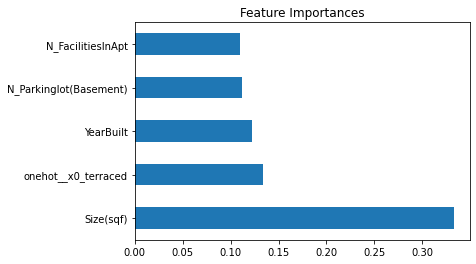

In [54]:
# Plot feature importances

feature_imp = pd.Series(final_model['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

## **Conclusion**

Berdasarkan model diatas, fitur 'Size(sqf)' menjadi fitur yang paling berpengaruh terhadap target yaitu 'Saleprice'. Metrik evaluasi yang digunakan pada model yaitu RMSE, MAE & MAPE. Jika ditinjau dari MAE, model machine learning ini memiliki nilai error 37530.40 (USD) dan jika dilihat dari MAPE atau persentase errornya yaitu 18%. Dengan nilai MAPE tersebut kita bisa mengatakan prediksi kita lumayan bagus. Pada model ini juga semakin tinggi nilai prediksinya semakin tinggi juga nilai errornya. Error yang dihasilkan pada model ini juga bisa dikarenakan oleh kurangnya fitur pada dataset yang kita punya.

## **Recommendation**

Hal-hal yang dapat dilakukan agar model lebih baik yaitu:
- Menambahkan fitur pada dataset, contohnya seperti biaya maintenance perbulan, demografi & psikografi masyarakat kawasan apartemen, dan lain-lain
- Menambahkan jumlah data pada dataset ini
- Mengecek prediksi mana saja yang memiliki nilai error yang tinggi

#### **Save Model**

In [55]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('rf', RandomForestRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('data_daegu_apartment.sav', 'wb'))

In [56]:
# Load model

filename = 'data_daegu_apartment.sav'
loaded_model = pickle.load(open(filename, 'rb'))